In [40]:
classcode = \
"""
from qcodes.instrument.visa import VisaInstrument
from qcodes import Parameter

class Weinschel_8320(VisaInstrument):

    def __init__(self, name, address, **kwargs):
        super().__init__(name, address, **kwargs)
    
        self.attenuation = Parameter('attenuation', unit='dB',
                                      instrument=self,
                                      set_cmd='ATTN ALL {:02.0f}',
                                      get_cmd='ATTN? 1',
                                      vals=vals.Enum(*np.arange(0, 60.1, 2).tolist()),
                                      get_parser=float,
                                      instrument=self)
    def _foo_bar() -> None:
        pass
"""


In [41]:
import parso

In [117]:
def parse_init_function_from_str(code: str, classname) -> parso.python.tree.Function:
    module = parso.parse(classcode)
    classes = tuple(child for child in module.children if isinstance(child, parso.python.tree.Class) and child.name.value == classname)
    assert len(classes) == 1
    myclass = classes[0]
    nodes = tuple(child for child in myclass.children if isinstance(child, parso.python.tree.PythonNode))
    assert len(nodes) == 1
    node = nodes[0]
    init_funcs = tuple(child for child in node.children if isinstance(child, parso.python.tree.Function) and child.name.value == '__init__')
    assert len(init_funcs) == 1
    return init_funcs[0]
    



In [120]:
init_func_tree = parse_init_function_from_str(classcode, "Weinschel_8320")

In [225]:
def extract_statements_from_func_node(parso_func: parso.python.tree.Function):
    function_bodys = tuple(child for child in init_func_tree.children if isinstance(child, parso.python.tree.PythonNode) and child.type == "suite")
    assert len(function_bodys) == 1
    function_body = function_bodys[0]
    statement_lines = tuple(child.children[0] for child in function_body.children if isinstance(child, parso.python.tree.PythonNode) and isinstance(child.children[0],  parso.python.tree.ExprStmt))
    
    return statement_lines

    

In [226]:
a = extract_statements_from_func_node(init_func_tree)

In [246]:
a[0].get_rhs().children[0].value == 'Parameter'

True

In [210]:
a[1].children[0]

<ExprStmt: self.attenuation = Parameter('attenuation', unit='dB',                                       instrument=self,                                       set_cmd='ATTN ALL {:02.0f}',                                       get_cmd='ATTN? 1',                                       vals=vals.Enum(*np.arange(0, 60.1, 2).tolist()),                                       get_parser=float,                                       instrument=self)@10,8>

In [207]:
type(a[1].children[0])

parso.python.tree.ExprStmt

In [209]:
parso.python.tree.ExprStmt

parso.python.tree.ExprStmt

In [146]:
node.children[2]

PythonNode(simple_stmt, [<ExprStmt: self.attenuation = Parameter('attenuation', unit='dB',                                       instrument=self,                                       set_cmd='ATTN ALL {:02.0f}',                                       get_cmd='ATTN? 1',                                       vals=vals.Enum(*np.arange(0, 60.1, 2).tolist()),                                       get_parser=float,                                       instrument=self)@10,8>, <Newline: '\n'>])

In [88]:
node.c

(<Function: __init__@7-17>,)

<Function: __init__@7-17>

PythonNode(suite, [<Newline: '\n'>, <Function: __init__@7-17>, <Function: _foo_bar@17-19>])

classes[0].children[1]

In [32]:
classes[0].children[3]

<Name: VisaInstrument@5,21>

In [33]:
type(myclass)

parso.python.tree.Class

In [6]:
module = parso.parse(classcode)
myclass = module.children[0]
myclass.children[-1].children[-1].children[-1].children[-1].children[0]

AttributeError: 'Newline' object has no attribute 'children'

In [18]:
myclass = module.children[0]

In [19]:
myclass.children[-1].children[-1].children[-1].children[-1].children[0]

<ExprStmt: self.attenuation = Parameter('attenuation', unit='dB',                                       set_cmd='ATTN ALL {:02.0f}',                                       get_cmd='ATTN? 1',                                       vals=vals.Enum(*np.arange(0, 60.1, 2).tolist()),                                       get_parser=float,                                       instrument=self)@7,8>

In [25]:
b = a.get_first_leaf()
while b is not None:
    print(b)
    b = b.get_next_leaf()

<Keyword: class>
<Name: Weinschel_8320@2,6>
<Operator: (>
<Name: VisaInstrument@2,21>
<Operator: )>
<Operator: :>
<Newline: '\n'>
<Keyword: def>
<Name: __init__@4,8>
<Operator: (>
<Name: self@4,17>
<Operator: ,>
<Name: name@4,23>
<Operator: ,>
<Name: address@4,29>
<Operator: ,>
<Operator: **>
<Name: kwargs@4,40>
<Operator: )>
<Operator: :>
<Newline: '\n'>
<Name: super@5,8>
<Operator: (>
<Operator: )>
<Operator: .>
<Name: __init__@5,16>
<Operator: (>
<Name: name@5,25>
<Operator: ,>
<Name: address@5,31>
<Operator: ,>
<Name: terminator@5,40>
<Operator: =>
<PythonErrorLeaf: ERRORTOKEN:"'", (5, 51)>
<PythonErrorLeaf: ERRORTOKEN:"'", (6, 0)>
<PythonErrorLeaf: OP:',', (6, 1)>
<PythonErrorLeaf: OP:'**', (6, 3)>
<Name: kwargs@6,5>
<PythonErrorLeaf: OP:')', (6, 11)>
<Newline: '\n'>
<Name: self@8,8>
<Operator: .>
<Name: attenuation@8,13>
<Operator: =>
<Name: Parameter@8,27>
<Operator: (>
<String: 'attenuation'>
<Operator: ,>
<Name: unit@8,52>
<Operator: =>
<String: 'dB'>
<Operator: ,>
<Name: set_

In [31]:
from inspect import getfullargspec, signature, getargs, getmembers

In [32]:
getmembers(Weinschel_8320)

[('__abstractmethods__', frozenset()),
 ('__annotations__',
  {'_all_instruments': 'Dict[str, weakref.ref[Instrument]]',
   '_instances': 'List[weakref.ref[Instrument]]'}),
 ('__class__', abc.ABCMeta),
 ('__del__',
  <function qcodes.instrument.base.Instrument.__del__(self) -> None>),
 ('__delattr__', <slot wrapper '__delattr__' of 'object' objects>),
 ('__dict__',
  mappingproxy({'__module__': '__main__',
                '__doc__': '\n    QCoDeS driver for the stepped attenuator\n    Weinschel is formerly known as Aeroflex/Weinschel\n    ',
                'attenuation1': <qcodes.instrument.parameter.Parameter: attenuation at 2591177886792>,
                '__init__': <function __main__.Weinschel_8320.__init__(self, name, address, **kwargs)>,
                '__abstractmethods__': frozenset(),
                '_abc_impl': <_abc_data at 0x25b4e7e51b0>})),
 ('__dir__',
  <function qcodes.utils.helpers.DelegateAttributes.__dir__(self) -> List[str]>),
 ('__doc__',
  '\n    QCoDeS driver 

### The `.yaml` file

The yaml file we use is

```
spec: "1.0"
devices:
  device 1:
    eom:
      GPIB INSTR:
        q: "\r"  # MAKE SURE! that this matches the terminator of the driver!
        r: "\r"
    error: ERROR
    dialogues:
      - q: "*IDN?"
        r: "QCoDeS, Weinschel 8320 (Simulated), 1337, 0.0.01"

    properties:

      attenuation:
        default: 0
        getter:
          q: "ATTN? 1"  # the set/get commands have to simply be copied over from the driver
          r: "{:02.0f}"
        setter:
          q: "ATTN ALL {:02.0f}"          

resources:  
  GPIB::1::INSTR:
    device: device 1
```

Note that since no physical connection is made, it doesn't matter what interface we pretend to use (GPIB, USB, ethernet, serial, ...). As a convention, we always write GPIB in the `.yaml` files.

We save the above file as `qcodes/instrument/sims/Weinschel_8320.yaml`. This simulates an instrument with no settable parameter; only an `*IDN?` response. This is enough to instantiate the instrument.

Then we may connect to the simulated instrument.

In [2]:
import qcodes.instrument.sims as sims
# path to the .yaml file containing the simulated instrument
visalib = sims.__file__.replace('__init__.py', 'Weinschel_8320.yaml@sim')

wein_sim = Weinschel_8320('wein_sim',
                          address='GPIB::1::INSTR',  # This matches the address in the .yaml file
                          visalib=visalib
                          )

In [16]:
getattr(Weinschel_8320, "attenuation")

AttributeError: type object 'Weinschel_8320' has no attribute 'attenuation'

In [15]:
getattr(Weinschel_8320, "attenuation1")


<qcodes.instrument.parameter.Parameter: attenuation at 2591177188424>

In [7]:
wein_sim.attenuation.set(2)

In [8]:
wein_sim.attenuation.get()

2.0

In [9]:
wein_sim.snapshot()

{'functions': {},
 'submodules': {},
 '__class__': '__main__.Weinschel_8320',
 'parameters': {'IDN': {'__class__': 'qcodes.instrument.parameter.Parameter',
   'full_name': 'wein_sim_IDN',
   'value': None,
   'raw_value': None,
   'ts': None,
   'inter_delay': 0,
   'unit': '',
   'label': 'IDN',
   'name': 'IDN',
   'instrument': '__main__.Weinschel_8320',
   'instrument_name': 'wein_sim',
   'vals': '<Anything>',
   'post_delay': 0},
  'timeout': {'__class__': 'qcodes.instrument.parameter.Parameter',
   'full_name': 'wein_sim_timeout',
   'value': 5,
   'raw_value': 5,
   'ts': '2021-06-25 10:49:14',
   'inter_delay': 0,
   'unit': 's',
   'label': 'timeout',
   'name': 'timeout',
   'instrument': '__main__.Weinschel_8320',
   'instrument_name': 'wein_sim',
   'vals': '<MultiType: Numbers v>=0, Enum: {None}>',
   'post_delay': 0},
  'attenuation': {'__class__': 'qcodes.instrument.parameter.Parameter',
   'full_name': 'wein_sim_attenuation',
   'value': 2.0,
   'raw_value': '02',
   '

Here is an example of how this looks in the docs

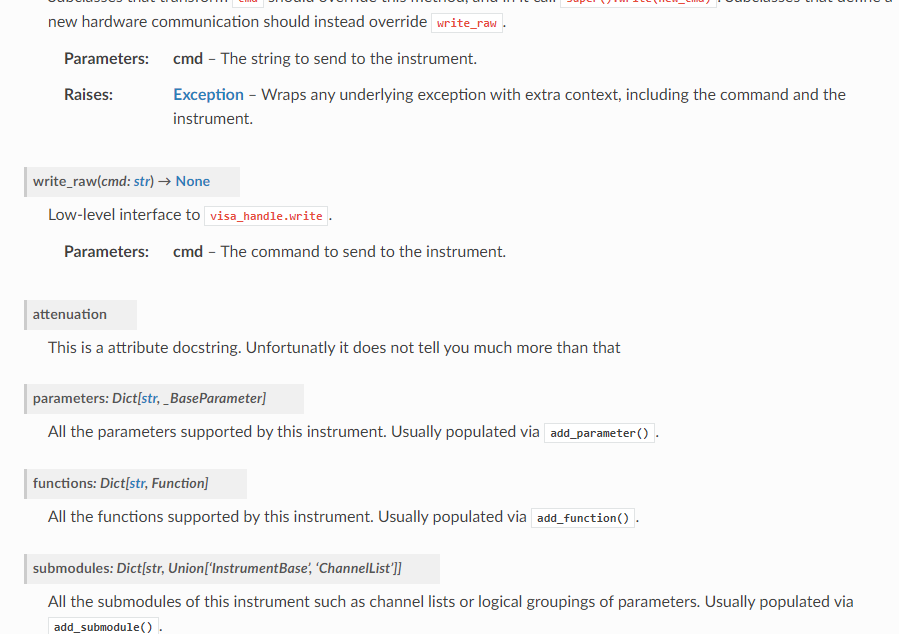